In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False #负号显示问题
import plotly
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.gridspec as gridspec

In [2]:
#构造两种捕食者方程函数，给出初值再预测走向
#可以把两种捕食者方程结合起来，预测两种捕食关系逐渐变成一种
#Predator prey
#dx/dt = x - alpha x y
#dy/dt = -y + beta x y

In [3]:
#系数应该增加到4个，防止alpha和beta作用过于突出。如果没有额外系数，alpha和beta作用是倒数式的。
#x是猎物
#y是捕猎者
#dx/dt = gamma x - alpha x y
#dy/dt = - delta y + beta x y
#x = delta / beta
#y = gamma / alpha

In [4]:
initial = {'step':0.001,'time':20,'alpha':0.05,'beta':1.0,'gamma':1.0,'delta':0.1,
           'x0':20,'y0':20}
#step是模拟步长，time是总时长，alpha、beta、gamma、delta就是基本参数，x0和y0是初始值

In [5]:
def lotka_vol(alpha,beta,gamma,delta,x0,y0,step = 0.001,time = 20):
    lenth = int(time/step)#数据总长，取决于总时间除以微步
    x_array,y_array = np.zeros(lenth),np.zeros(lenth)#建立2个定长array，后面修改内部的值
    x_array[0],y_array[0] = x0,y0#设置初值
    for i in range(1,lenth):
        x_array[i] = x_array[i-1] + step *(gamma * x_array[i-1] - alpha * x_array[i-1] * y_array[i-1])
        #核心递推方程，对应dx/dt = gamma x - alpha x y
        y_array[i] = y_array[i-1] + step *( - delta * y_array[i-1] + beta * x_array[i-1] * y_array[i-1])
        #核心递推方程，对应dy/dt = - delta y + beta x y
    answer = pd.DataFrame({'x':x_array,'y':y_array})#最后结果生成dataframe
    return answer

In [6]:
def lotka_image(alpha,beta,gamma,delta,x0,y0):#初始传4个参数
    plt.figure(2)
    fig, ax =  plt.subplots(1,1,figsize = (12,6))#设置图表面积
    plt.subplot(111)#设置图表数量
    plt.plot(lotka_vol(alpha,beta,gamma,delta,x0,y0)['x'],label ='被捕食者数量')#作图，x列
    plt.plot(lotka_vol(alpha,beta,gamma,delta,x0,y0)['y'],label ='捕食者数量')#做图，y列
    plt.rcParams['font.sans-serif']=['SimHei']#显示中文字体
    plt.title(r'捕食者-被捕食者变化图', fontsize=20)#显示标题
    plt.legend(fontsize=15)#显示图例字号
    plt.xlabel('时间', fontsize=18)#显示x轴单位
    plt.ylabel('种群密度',fontsize=18)#显示y轴单位
    plt.ylim(0,400)#y轴上限
    fig.text(0.75, 0.20, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印
    ax1 = fig.add_axes([.35, .45, .35, .35], facecolor='w',alpha = 0.2)#添加副图
    plt.title('相图',fontsize = 15)#副图标题
    plt.plot(lotka_vol(alpha,beta,gamma,delta,x0,y0)['x'],
             lotka_vol(alpha,beta,gamma,delta,x0,y0)['y'],color = 'k')#相图的x和y
    plt.xlabel('被捕食者', fontsize=12)#x轴标题
    plt.ylabel('捕食者',fontsize=12)#y轴标题
    plt.xlim(0,100)#x轴范围
    plt.ylim(0,100)#y轴范围
interactive_plot = interactive(lotka_image, 
                               alpha=(0,0.100,0.01),
                               beta=(0,0.100,0.01),
                               gamma=(0,2.00,0.05),
                               delta=(0,2.00,0.05),
                               x0 = (0,100,5), 
                               y0 =(0,100,5))#关键代码设置绘图函数和互动参数
output = interactive_plot.children[-1]
output.layout.height = '500px'#设置绘图高度
interactive_plot#显示绘图控件

interactive(children=(FloatSlider(value=0.05, description='alpha', max=0.1, step=0.01), FloatSlider(value=0.05…

In [7]:
#本节显示相图中的吸引子和场
#dx/dt = gamma x - alpha x y
#dy/dt = - delta y + beta x y
#x = delta / beta
#y = gamma / alpha
def lotka_image_field(alpha,beta,gamma,delta,x0,y0):#初始传4个参数
    fig, ax =  plt.subplots(1,1,figsize = (12,6))#设置图表面积
    plt.subplot(111)#设置图表数量
    plt.plot(lotka_vol(alpha,beta,gamma,delta,x0,y0)['x'],label ='被捕食者数量')#作图，x列，物种其一
    plt.plot(lotka_vol(alpha,beta,gamma,delta,x0,y0)['y'],label ='捕食者数量')#作图，y列，物种其二
    plt.rcParams['font.sans-serif']=['SimHei']#显示中文字体
    plt.title(r'捕食者-被捕食者变化图', fontsize=20)#显示标题
    plt.legend(fontsize=15)#显示图例字号
    plt.xlabel('时间', fontsize=18)#显示x轴单位
    plt.ylabel('种群密度',fontsize=18)#显示y轴单位
    plt.ylim(0,400)#y轴上限
    fig.text(0.75, 0.20, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印
    ax1 = fig.add_axes([.35, .45, .35, .35], facecolor='w',alpha = 0.2)#添加副图
    plt.title('相图',fontsize = 15)#副图标题
    X, Y = np.meshgrid(np.arange(0, 110, 10), np.arange(0, 110, 10))
    dx_dt = gamma * X - alpha * X * Y
    dy_dt = -delta * Y + beta * X * Y
    M = np.hypot(dx_dt, dy_dt)
    Q = ax1.quiver(X, Y, dx_dt, dy_dt,M, units='width')
    plt.plot(lotka_vol(alpha,beta,gamma,delta,x0,y0)['x'],
             lotka_vol(alpha,beta,gamma,delta,x0,y0)['y'],color = 'k')#相图的x和y
    plt.plot(delta / beta, gamma / alpha,'*',color = 'red')
    plt.xlabel('被捕食者', fontsize=12)#x轴标题
    plt.ylabel('捕食者',fontsize=12)#y轴标题
    plt.xlim(0,100)#x轴范围
    plt.ylim(0,100)#y轴范围
interactive_plot = interactive(lotka_image_field, 
                               alpha=(0,0.100,0.01),
                               beta=(0,0.100,0.01),
                               gamma=(0,2.00,0.05),
                               delta=(0,2.00,0.05),
                               x0 = (0,100,5), 
                               y0 =(0,100,5))#关键代码设置绘图函数和互动参数
output = interactive_plot.children[-1]
output.layout.height = '500px'#设置绘图高度
interactive_plot#显示绘图控件

interactive(children=(FloatSlider(value=0.05, description='alpha', max=0.1, step=0.01), FloatSlider(value=0.05…

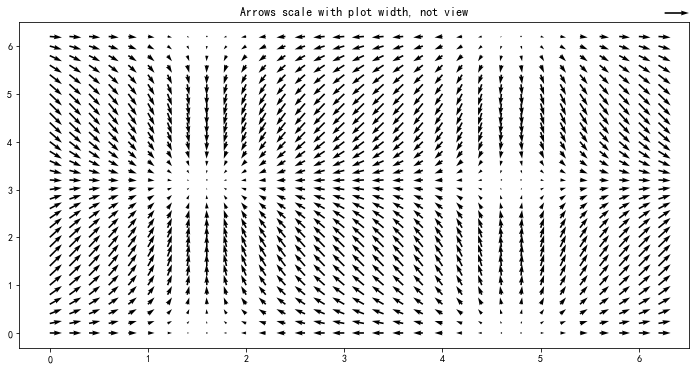

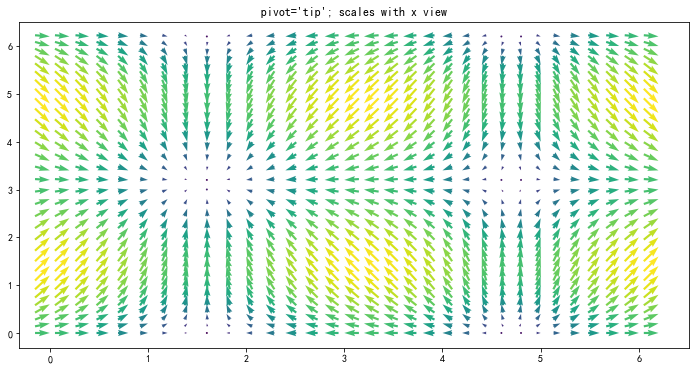

In [8]:
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)
fig1, ax1 = plt.subplots(figsize = (12,6))
ax1.set_title('Arrows scale with plot width, not view')
Q = ax1.quiver(X, Y, U, V, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

fig3, ax3 = plt.subplots(figsize = (12,6))
ax3.set_title("pivot='tip'; scales with x view")
M = np.hypot(U, V)
Q = ax3.quiver(X, Y, U, V, M, units='x', pivot='tip', width=0.022,
               scale=1 / 0.15)
#qk = ax3.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
#ax3.scatter(X, Y, color='0.5', s=1)

plt.show()

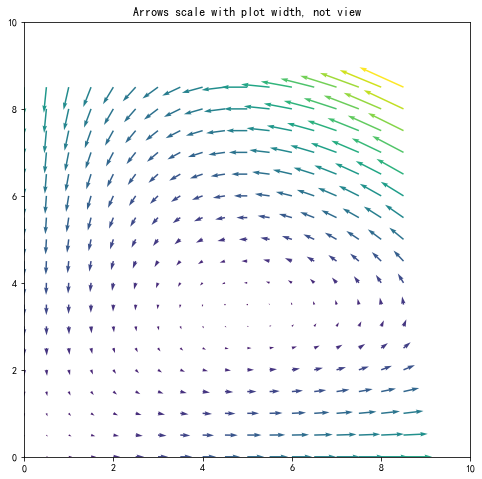

In [9]:
X, Y = np.meshgrid(np.arange(0, 9, .5), np.arange(0, 9, .5))
#dx/dt = x - alpha x y
#dy/dt = -y + beta x y
alpha = 0.3
beta = 0.2
dx_dt = X - alpha * X * Y
dy_dt = -Y + beta * X * Y
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Arrows scale with plot width, not view')
M = np.hypot(dx_dt, dy_dt)
Q = ax1.quiver(X, Y, dx_dt, dy_dt,M, units='width')
#qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')
plt.xlim(0 , 10)
plt.ylim(0 , 10)
plt.show()

In [11]:
def lot_feild(x,y,a,b):#定义场函数
    X, Y = np.meshgrid(np.arange(0, x, .5), np.arange(0, y, .5))#xy网格化
    alpha = a#设置参数
    beta = b#设置参数
    dx_dt = X - alpha * X * Y#非常粗暴地将数组直接运算，居然线性就可以
    dy_dt = -Y + beta * X * Y#非常粗暴地将数组直接运算，居然线性就可以
    return dx_dt,dy_dt#输出运算结果

In [12]:
def lotka_feild_image(x,y,a,b):#定义绘图函数
    fig, ax1 =  plt.subplots(1,1,figsize = (10,8))#绘图
    X, Y = np.meshgrid(np.arange(0, x, .5), np.arange(0, y, .5))#定义xy范围
    dx_dt,dy_dt = lot_feild(x,y,a,b)#输出场函数结果
    M = np.hypot(dx_dt, dy_dt)#计算矢量的模
    Q = ax1.quiver(X, Y, dx_dt,dy_dt,M, units='width')#关键函数，生成场绘图
    plt.rcParams['font.sans-serif']=['SimHei']#汉字字体设置
    plt.title(r'捕食者方程相图', fontsize=20)#标题设置
    plt.ylim(0,6)#y轴范围
    plt.ylim(0,6)#x轴范围
    fig.text(0.75, 0.25, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印
    plt.show()#显示绘图

interactive_plot = interactive(lotka_feild_image, 
                               x=(0,20,2), 
                               y=(0,20,2),
                               a = (0,1.00,0.1), 
                               b =(0,1.00,0.1))#互动绘图函数
output = interactive_plot.children[-1]
#output.layout.height = '500px'
interactive_plot#显示绘图

interactive(children=(IntSlider(value=10, description='x', max=20, step=2), IntSlider(value=10, description='y…

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.5), FloatSlider(value=5.0, desc…

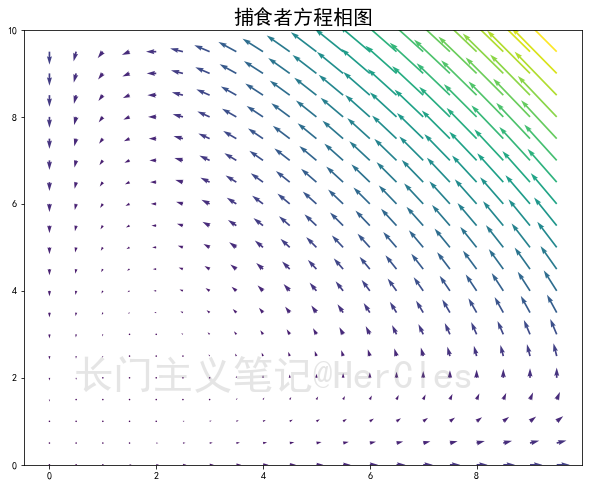

In [13]:
def lotka_complex_image(x,y,a,b):#定义绘图函数，这次绘制场和相图在一起
    fig, ax1 =  plt.subplots(1,1,figsize = (10,8))#绘图
    x_max,y_max = 10,10#定义网格和坐标范围的参数
    X, Y = np.meshgrid(np.arange(0, x_max, .5), np.arange(0, y_max, .5))#定义网格范围
    dx_dt,dy_dt = lot_feild(x_max,y_max,a,b)#输出场函数结果
    M = np.hypot(dx_dt, dy_dt)#计算矢量的模
    Q = ax1.quiver(X, Y, dx_dt,dy_dt,M, units='width')#关键函数，生成场绘图
    plt.rcParams['font.sans-serif']=['SimHei']#汉字字体设置
    plt.title(r'捕食者方程相图', fontsize=20)#标题设置
    plt.ylim(0,x_max)#y轴范围
    plt.ylim(0,x_max)#x轴范围
    fig.text(0.75, 0.25, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印
    alpha,beta,x0,y0 = a,b,x,y
    ax2 = plt.plot(lotka_vol(alpha,beta,x0,y0)['x'],lotka_vol(alpha,beta,x0,y0)['y'],color = 'k')#相图的x和y
    plt.show()#显示绘图
interactive_plot = interactive(lotka_complex_image, 
                               x=(0,10,0.5), 
                               y=(0,10,0.5),
                               a = (0,1.00,0.1), 
                               b =(0,1.00,0.1))#互动绘图函数
output = interactive_plot.children[-1]
#output.layout.height = '500px'
interactive_plot#显示绘图

In [14]:
#捕食者方程改进形式
#dx/dt = (a1 - b1 x -c1 y) x
#dy/dt = (a2 - c2 y / x) y
'''def lotka_vol_1948(a):
    lenth = int(a['time']/a['step'])
    x_array,y_array = np.zeros(lenth),np.zeros(lenth)
    x_array[0],y_array[0] = a['x0'],a['y0']
    for i in range(1,lenth):
        x_array[i] = x_array[i-1] + a['step'] *(a['a1'] - a['b1'] * x_array[i-1] -a['c1'] * y_array[i-1]) * x_array[i-1]
        y_array[i] = y_array[i-1] + a['step'] *( a['a2'] - a['c2'] * y_array[i-1] / x_array[i-1]) * y_array[i-1]
    answer = pd.DataFrame({'x':x_array,'y':y_array})
    return answer'''
def lotka_vol_1948(alpha1,alpha2,beta,gama1,gama2,x0,y0,step = 0.001,time = 20):
    lenth = int(time/step)
    x_array,y_array = np.zeros(lenth),np.zeros(lenth)
    x_array[0],y_array[0] = x0,y0
    for i in range(1,lenth):
        x_array[i] = x_array[i-1] + step *(alpha1 - beta * x_array[i-1] -gama1 * y_array[i-1]) * x_array[i-1]
        y_array[i] = y_array[i-1] + step *(alpha2 - gama2 * y_array[i-1] / x_array[i-1]) * y_array[i-1]
    answer = pd.DataFrame({'x':x_array,'y':y_array})
    return answer

In [15]:
#捕食者方程改进形式,参数很难实现效果
def lotka_image_1948(alpha1,alpha2,beta,gama1,gama2,x0,y0,step = 0.001,time = 20):
    fig, ax =  plt.subplots(1,1,figsize = (12,6))
    plt.subplot(111)
    plt.plot(lotka_vol_1948(alpha1,alpha2,beta,gama1,gama2,x0,y0)['x'],label ='被捕食者数量')
    plt.plot(lotka_vol_1948(alpha1,alpha2,beta,gama1,gama2,x0,y0)['y'],label ='捕食者数量')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.title(r'捕食者-被捕食者变化图', fontsize=20)
    plt.legend(fontsize=15)
    plt.xlabel('时间', fontsize=18)
    plt.ylabel('种群个数',fontsize=18)
    plt.ylim(0,400)
    fig.text(0.75, 0.25, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印
    ax1 = fig.add_axes([.4, .52, .25, .25], facecolor='w',alpha = 0.2)
    plt.title('相图',fontsize = 15)
    plt.plot(lotka_vol_1948(alpha1,alpha2,beta,gama1,gama2,x0,y0)['x'],
             lotka_vol_1948(alpha1,alpha2,beta,gama1,gama2,x0,y0)['y'],color = 'k')
    plt.xlabel('被捕食者', fontsize=12)
    plt.ylabel('捕食者',fontsize=12)
    plt.xlim(0,100)
    plt.ylim(0,100)
interactive_plot = interactive(lotka_image_1948, alpha1=(0,0.50,0.1),alpha2=(0,0.50,0.1),
                               beta=(0,0.50,0.1),
                               gama1=(0,0.50,0.1),gama2=(0,0.50,0.1),
                               x0 = (0,100,5), y0 =(0,100,5)
                              )
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=0.2, description='alpha1', max=0.5), FloatSlider(value=0.2, descriptio…

In [16]:
#竞争模型无量纲化形式
#dx/dt = x (1 - x - a1 y)
#dy/dt = k y(1 - y - a2 x)
#原始形式
#dx/dt = r1 x [1 - (x + b1 y )/k1]
#dy/dt = r2 y [1 - (y + b2 x )/k2]
#r是自然增长率，b是竞争项，极限容量k

In [17]:
initial_compete = {'step':0.01,'time':20,'x0':10,'y0':10,'k1':500,'k2':300,'r1':2,'r2':2.5,'b1':0.5,'b2':0.6}
#step是模拟步长，time是总时长，r是自然增长率，b是竞争项，极限容量k，x0和y0是初始值

In [18]:
def compete(r1,r2,b1,b2,k1,k2,x0,y0,step = 0.01,time = 5):
    lenth = int(time/step)#总迭代次数等于总时长除以每步长
    x_array,y_array = np.zeros(lenth),np.zeros(lenth)#初始化2个array
    x_array[0],y_array[0] = x0,y0#初始化第一个值
    for i in range(1,lenth):#从第二个值开始迭代
        x_array[i] = x_array[i-1] + r1 * x_array[i-1] * (1 - 
                                                              (x_array[i-1] + b1 * y_array[i-1]) / k1
                                                             )
        y_array[i] = y_array[i-1] + r2 * y_array[i-1] * (1 - 
                                                              (y_array[i-1] + b2 * x_array[i-1]) / k2
                                                             )
        answer = pd.DataFrame({'x':x_array,'y':y_array})#生成表格dataframe
    return answer

In [19]:
#b:竞争项，r：自然增长率，k：极限容量
def compete_image(r1,r2,b1,b2,k1,k2,x0,y0,step = 0.01,time = 1):
    fig, ax =  plt.subplots(1,1,figsize = (12,6))
    plt.subplot(111)
    plt.plot(compete(r1,r2,b1,b2,k1,k2,x0,y0,step = 0.01,time = 5)['x'],label ='物种A')
    plt.plot(compete(r1,r2,b1,b2,k1,k2,x0,y0,step = 0.01,time = 5)['y'],label ='物种B')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.title(r'二物种竞争变化图', fontsize=20)
    plt.legend(fontsize=15)
    plt.xlabel('时间', fontsize=18)
    plt.ylabel('种群个数',fontsize=18)
    plt.ylim(0,300)#y轴范围，可以随上限变化
    fig.text(0.75, 0.25, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印
    ax1 = fig.add_axes([.4, .52, .25, .25], facecolor='w',alpha = 0.2)
    plt.title('相图',fontsize = 15)
    plt.plot(compete(r1,r2,b1,b2,k1,k2,x0,y0,step = 0.01,time = 5)['x'],
             compete(r1,r2,b1,b2,k1,k2,x0,y0,step = 0.01,time = 5)['y'],
             color = 'k')
    plt.xlabel('物种A', fontsize=12)
    plt.ylabel('物种B',fontsize=12)
    plt.xlim(0,600)
    plt.ylim(0,600)
interactive_plot = interactive(compete_image, r1=(0.0,1.5,0.05),r2=(0.0,1.5,0.05),
                               b1=(0,0.8,0.1),b2=(0,0.8,0.1),
                               k1=(100,200,10),k2=(100,200,10),
                               x0 = (0,100,10), y0 =(0,100,10)
                              )
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=0.75, description='r1', max=1.5, step=0.05), FloatSlider(value=0.75, d…

In [20]:
def compete_tri(r1,r2,r3,b1,b2,b3,c1,c2,c3,k1,k2,k3,x0,y0,z0,step = 0.01,time = 5):
    lenth = int(time/step)#总迭代次数等于总时长除以每步长
    x_array,y_array,z_array = np.zeros(lenth),np.zeros(lenth),np.zeros(lenth)#初始化3个array
    x_array[0],y_array[0],z_array[0] = x0,y0,z0#初始化第一个值
    for i in range(1,lenth):#从第二个值开始迭代
        x_array[i] = x_array[i-1] + r1 * x_array[i-1] * (1 - 
                                                              (x_array[i-1] + b1 * y_array[i-1] + c1 * z_array[i-1]) / k1
                                                             )
        y_array[i] = y_array[i-1] + r2 * y_array[i-1] * (1 - 
                                                              (y_array[i-1] + b2 * x_array[i-1] + c2 * z_array[i-1]) / k2
                                                             )
        z_array[i] = z_array[i-1] + r3 * z_array[i-1] * (1 - 
                                                              (z_array[i-1] + b3 * x_array[i-1] + c3 * y_array[i-1]) / k3
                                                             )
        answer = pd.DataFrame({'x':x_array,'y':y_array,'z':z_array})#生成表格dataframe
    return answer

In [21]:
#b:竞争项，r：自然增长率，k：极限容量
def compete_image_tri(r1,r2,r3,b1,b2,b3,c1,c2,c3,k1,k2,k3,x0,y0,z0,step = 0.01,time = 10):
    fig, ax =  plt.subplots(1,1,figsize = (12,6))
    plt.subplot(111)
    plt.plot(compete_tri(r1,r2,r3,b1,b2,b3,c1,c2,c3,k1,k2,k3,x0,y0,z0,step = step,time = time)['x'],label ='物种A')
    plt.plot(compete_tri(r1,r2,r3,b1,b2,b3,c1,c2,c3,k1,k2,k3,x0,y0,z0,step = step,time = time)['y'],label ='物种B')
    plt.plot(compete_tri(r1,r2,r3,b1,b2,b3,c1,c2,c3,k1,k2,k3,x0,y0,z0,step = step,time = time)['z'],label ='物种C')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.title(r'三物种竞争变化图', fontsize=20)
    plt.legend(fontsize=15)
    plt.xlabel('时间', fontsize=18)
    plt.ylabel('种群个数',fontsize=18)
    plt.ylim(0,300)#y轴范围，可以随上限变化
    fig.text(0.75, 0.25, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印
interactive_plot = interactive(compete_image_tri, 
                               r1=(0.0,1.5,0.05),r2=(0.0,1.5,0.05),r3=(0.0,1.5,0.05),
                               b1=(0,0.8,0.1),b2=(0,0.8,0.1),b3=(0,0.8,0.1),
                               c1=(0,0.8,0.1),c2=(0,0.8,0.1),c3=(0,0.8,0.1),
                               k1=(100,200,10),k2=(100,200,10),k3=(100,200,10),
                               x0 = (0,100,10), y0 =(0,100,10),z0 =(0,100,10)
                              )
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=0.75, description='r1', max=1.5, step=0.05), FloatSlider(value=0.75, d…

In [22]:
a = widgets.IntSlider(2,0,10,2)
b = widgets.IntSlider(1.0,0.0,1.5,0.05)
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))
    print(a*b*c)

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [23]:
#b:竞争项，r：自然增长率，k：极限容量
#改进排版
def compete_image_tri(r1,r2,r3,b1,b2,b3,c1,c2,c3,k1,k2,k3,x0,y0,z0,step = 0.01,time = 1):
    fig, ax =  plt.subplots(1,1,figsize = (12,6))
    plt.subplot(111)
    plt.plot(compete_tri(r1,r2,r3,b1,b2,b3,c1,c2,c3,k1,k2,k3,x0,y0,z0,step = 0.01,time = 0.5)['x'],label ='物种A')
    plt.plot(compete_tri(r1,r2,r3,b1,b2,b3,c1,c2,c3,k1,k2,k3,x0,y0,z0,step = 0.01,time = 0.5)['y'],label ='物种B')
    plt.plot(compete_tri(r1,r2,r3,b1,b2,b3,c1,c2,c3,k1,k2,k3,x0,y0,z0,step = 0.01,time = 0.5)['z'],label ='物种C')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.title(r'三物种竞争变化图', fontsize=20)
    plt.legend(fontsize=15)
    plt.xlabel('时间', fontsize=18)
    plt.ylabel('种群个数',fontsize=18)
    plt.ylim(0,300)#y轴范围，可以随上限变化
    fig.text(0.75, 0.25, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印
r1 = widgets.FloatSlider(value=1.0,min=0.0,max=1.5,step=0.05,description='r1:')
r2 = widgets.FloatSlider(value=1.0,min=0.0,max=1.5,step=0.05,description='r2:')
r3 = widgets.FloatSlider(value=1.0,min=0.0,max=1.5,step=0.05,description='r3:')
b1 = widgets.FloatSlider(value=0.5,min=0,max=1.5,step=0.1,description='b1:')
b2 = widgets.FloatSlider(value=0.5,min=0,max=1.5,step=0.1,description='b2:')
b3 = widgets.FloatSlider(value=0.5,min=0,max=1.5,step=0.1,description='b3:')
c1 = widgets.FloatSlider(value=0.5,min=0,max=1.5,step=0.1,description='c1:')
c2 = widgets.FloatSlider(value=0.5,min=0,max=1.5,step=0.1,description='c2:')
c3 = widgets.FloatSlider(value=0.5,min=0,max=1.5,step=0.1,description='c3:')
k1 = widgets.IntSlider(150,100,200,10,description='k1:')
k2 = widgets.IntSlider(150,100,200,10,description='k2:')
k3 = widgets.IntSlider(150,100,200,10,description='k3:')
x0 = widgets.IntSlider(50,0,100,10,description='x0:')
y0 = widgets.IntSlider(50,0,100,10,description='y0:')
z0 = widgets.IntSlider(50,0,100,10,description='z0:')
first_ui = widgets.HBox([r1, r2, r3])
second_ui = widgets.HBox([b1,b2,b3])
third_ui = widgets.HBox([c1,c2,c3])
forth_ui = widgets.HBox([k1,k2,k3])
fifth_ui = widgets.HBox([x0,y0,z0])
ui = widgets.VBox([first_ui,second_ui,third_ui,forth_ui,fifth_ui])

out = widgets.interactive_output(compete_image_tri, {'r1' : r1, 'r2' : r2, 'r3' : r3,
                                                     'b1' : b1, 'b2' : b2, 'b3' : b3,
                                                    'c1' : c1, 'c2' : c2, 'c3' : c3,
                                                    'k1' : k1, 'k2' : k2, 'k3' : k3,
                                                    'x0' : x0, 'y0' : y0, 'z0' : z0})

out.layout.height = '500px'

display(ui, out)

Output(layout=Layout(height='500px'))

In [24]:
#构造两对捕食者的相互关系x-y和u-v
#其中x和u竞争生产者，而y和v分别只捕食x和u，这次探讨符号化编程，解微分方程
#dx/dt = x - alpha x y
#dy/dt = -y + beta x y
#dx/dt = r1 x [1 - (x + b1 y )/k1]
#dy/dt = r2 y [1 - (y + b2 x )/k2]
#方法是将双方竞争的焦点从总种群数量改成不动点的位置，不动点距离原点的距离就是捕食者双方围绕的种群数量
#beta越小，不动点x轴位置越大，不动点的x坐标是1/beta
#alpha越小，不动点y轴位置越大，不动点的y坐标是 1/alpha
#所以需要参数控制alpha和beta
#公式将被改造成四个物种v、u、x、y
#du/dt = lamda1 u - alpha1 u v(2 - )
#这样不动点的y坐标就是lamda1/alpha1
#dv/dt = -lamda1 v - beta1 u v
#这样不动点的y坐标就是lamda1/beta1
#dx/dt = lamda2 x - alpha2 x y
#dy/dt = -lamda2 y + beta2 x y
#dlamda1/dt = r1 lamda1 [1 - (lamda1 + b1 lamda2)/k1]
#dlamda2/dt = r2 lamda2 [1 - (lamda2 + b2 lamda1)/k2]
#六个方程联立

In [25]:
def compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,step = 0.02,time = 1):
    lenth = int(time/step)#总迭代次数等于总时长除以每步长
    x_array,y_array,u_array,v_array = np.zeros(lenth),np.zeros(lenth),np.zeros(lenth),np.zeros(lenth)
    lamda1_array,lamda2_array = np.zeros(lenth),np.zeros(lenth)
    #初始化6个array
    x_array[0],y_array[0],u_array[0],v_array[0],lamda1_array[0],lamda2_array[0] = x0,y0,u0,v0,lamda10,lamda20#初始化第一个值
    for i in range(1,lenth):#从第二个值开始迭代
        #dlamda1/dt = r1 lamda1 [1 - (lamda1 + b1 lamda2)/k1]
        lamda1_array[i] = lamda1_array[i-1] + step *r1 * lamda1_array[i-1] * (1 - 
                                                              (lamda1_array[i-1] + b1 * lamda2_array[i-1]) / k1)
        #dlamda2/dt = r2 lamda2 [1 - (lamda2 + b2 lamda1)/k2]
        lamda2_array[i] = lamda2_array[i-1] + step *r2 * lamda2_array[i-1] * (1 - 
                                                              (lamda2_array[i-1] + b2 * lamda1_array[i-1]) / k2)
        #dx/dt = lamda2 x - alpha2 x y
        x_array[i] = x_array[i-1] + step *( lamda2_array[i] * x_array[i-1] - alpha2 * x_array[i-1] * y_array[i-1])
        #dy/dt = -y + beta2 x y(2 - lamda2)
        y_array[i] = y_array[i-1] + step *( - lamda2_array[i] * y_array[i-1] + beta2 * x_array[i-1] * y_array[i-1])
        #du/dt = u - alpha1 u v(2 - lamda1)
        u_array[i] = u_array[i-1] + step *( lamda1_array[i] * u_array[i-1] - alpha1 * u_array[i-1] * v_array[i-1])
        #dv/dt = -v - beta1 lamda1 u v
        v_array[i] = v_array[i-1] + step *( - lamda1_array[i] * v_array[i-1] + beta1 * u_array[i-1] * v_array[i-1])
        answer = pd.DataFrame({'x':x_array,'y':y_array,'u':u_array,'v':v_array,'lamda1':lamda1_array,'lamda2':lamda2_array})
        #生成表格dataframe
    return answer

In [26]:
def compete_image_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,step = 0.05,time = 40):
    fig, ax =  plt.subplots(1,1,figsize = (12,8))
    plt.subplot(111)
    plt.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['x'],label ='物种X')
    plt.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['y'],label ='物种Y')
    plt.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['u'],label ='物种U')
    plt.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['v'],label ='物种V')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.title(r'四物种竞争变化图', fontsize=20)
    plt.legend(fontsize=15)
    plt.xlabel('时间', fontsize=18)
    plt.ylabel('种群个数',fontsize=18)
    plt.ylim(0,500)#y轴范围，可以随上限变化
    fig.text(0.75, 0.25, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印
    ax1 = fig.add_axes([.4, .52, .25, .25], facecolor='w',alpha = 0.2)
    plt.title('相图',fontsize = 15)
    plt.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['lamda1'],label ='lamda1')
    plt.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['lamda2'],label ='lamda2')
    plt.xlabel('lamda', fontsize=12)
    plt.ylabel('2',fontsize=12)
    #plt.xlim(0,2)
    plt.ylim(0,2)
r1 = widgets.FloatSlider(value=1.4,min=0.0,max=3.0,step=0.1,description='r1:')
r2 = widgets.FloatSlider(value=1.4,min=0.0,max=3.0,step=0.1,description='r2:')
b1 = widgets.FloatSlider(value=1.0,min=0,max=2.0,step=0.2,description='b1:')
b2 = widgets.FloatSlider(value=0.9,min=0,max=2.0,step=0.2,description='b2:')
alpha1 = widgets.FloatSlider(value=0.02,min=0.0,max=2.0,step=0.05,description='alpha1:')
beta1 = widgets.FloatSlider(value=0.03,min=0.0,max=2.0,step=0.05,description='beta1:')
alpha2 = widgets.FloatSlider(value=0.04,min=0.0,max=2.0,step=0.05,description='alpha2:')
beta2 = widgets.FloatSlider(value=0.05,min=0.0,max=2.0,step=0.05,description='beta2:')
lamda10 = widgets.FloatSlider(value=0.5,min=0.0,max=2.0,step=0.05,description='lamda10:')
lamda20 = widgets.FloatSlider(value=1.3,min=0.0,max=2.0,step=0.05,description='lamda20:')
k1 = widgets.FloatSlider(value=1.7,min=0.0,max=2.0,step=0.1,description='k1:')
k2 = widgets.FloatSlider(value=1.1,min=0.0,max=2.0,step=0.1,description='k2:')
x0 = widgets.IntSlider(40,0,200,10,description='x0:')
y0 = widgets.IntSlider(90,0,200,10,description='y0:')
u0 = widgets.IntSlider(30,0,100,10,description='u0:')
v0 = widgets.IntSlider(20,0,100,10,description='v0:')
first_ui = widgets.HBox([r1, r2])
second_ui = widgets.HBox([b1,b2])
third_ui = widgets.HBox([k1,k2,lamda10,lamda20])
forth_ui = widgets.HBox([alpha1,alpha2,beta1,beta2])
fifth_ui = widgets.HBox([x0,y0,u0,v0])
ui = widgets.VBox([first_ui,second_ui,third_ui,forth_ui,fifth_ui])

out = widgets.interactive_output(compete_image_double, {'r1' : r1, 'r2' : r2,
                                                     'b1' : b1, 'b2' : b2,
                                                    'alpha1':alpha1,'alpha2':alpha2,
                                                     'beta1':beta1,'beta2':beta2,
                                                    'k1' : k1, 'k2' : k2,
                                                    'x0' : x0, 'y0' : y0, 'u0' : u0,'v0':v0,
                                                        'lamda10':lamda10,'lamda20':lamda20})

out.layout.height = '600px'

display(ui, out)

Output(layout=Layout(height='600px'))

In [27]:
def compete_image_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,step = 0.05,time = 40):
    fig = plt.figure(tight_layout=True,figsize = (12,10))
    gs = gridspec.GridSpec(2, 2)
    ax = fig.add_subplot(gs[0, :])
    ax.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['x'],label ='物种X')
    ax.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['y'],label ='物种Y')
    ax.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['u'],label ='物种U')
    ax.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['v'],label ='物种V')
    #plt.rcParams['font.sans-serif']=['SimHei']
    ax.set_title(r'四物种竞争变化图',fontsize=20)
    ax.legend(fontsize=15)
    ax.set_xlabel('时间', fontsize=18)
    ax.set_ylabel('种群个数', fontsize=18)
    ax.set_ylim(0,500) #y轴范围，可以随上限变化
    '''    fig.text(0.75, 0.25, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印'''
    ax = fig.add_subplot(gs[1,0])#lamda的变化关系
    #plt.title('相图',fontsize = 15)
    ax.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['lamda1'],label ='lamda1负责u和v')
    ax.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['lamda2'],label ='lamda2负责x和y')
    ax.legend(fontsize=15)
    ax.set_xlabel('lamda', fontsize=12)
    #ax.set_ylabel('2',fontsize=12)
    #plt.xlim(0,2)
    #ax.set_ylim(0,2)
    ax = fig.add_subplot(gs[1,1])#相图
    #plt.title('相图',fontsize = 15)
    ax.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['x'],
            compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['y'],label ='x和y')
    ax.plot(compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['u'],
            compete_double(r1,r2,b1,b2,k1,k2,alpha1,alpha2,beta1,beta2,x0,y0,u0,v0,lamda10,lamda20,
                            step = step,time = time)['v'],label ='u和v')
    ax.legend(fontsize=15)
    ax.set_xlabel('', fontsize=12)
    #ax.set_ylabel('2',fontsize=12)
    #plt.xlim(0,2)
    #ax.set_ylim(0,2)
    fig.align_labels()
r1 = widgets.FloatSlider(value=0.4,min=0.0,max=3.0,step=0.1,description='r1:')
r2 = widgets.FloatSlider(value=0.5,min=0.0,max=3.0,step=0.1,description='r2:')
b1 = widgets.FloatSlider(value=0.6,min=0,max=2.0,step=0.2,description='b1:')
b2 = widgets.FloatSlider(value=0.4,min=0,max=2.0,step=0.2,description='b2:')
alpha1 = widgets.FloatSlider(value=0.02,min=0.0,max=0.3,step=0.01,description='alpha1:')
beta1 = widgets.FloatSlider(value=0.03,min=0.0,max=0.3,step=0.01,description='beta1:')
alpha2 = widgets.FloatSlider(value=0.04,min=0.0,max=0.3,step=0.01,description='alpha2:')
beta2 = widgets.FloatSlider(value=0.05,min=0.0,max=0.3,step=0.01,description='beta2:')
lamda10 = widgets.FloatSlider(value=0.5,min=0.0,max=2.0,step=0.05,description='lamda10:')
lamda20 = widgets.FloatSlider(value=1.3,min=0.0,max=2.0,step=0.05,description='lamda20:')
k1 = widgets.FloatSlider(value=1.6,min=0.0,max=3.0,step=0.2,description='k1:')
k2 = widgets.FloatSlider(value=1.0,min=0.0,max=3.0,step=0.2,description='k2:')
x0 = widgets.IntSlider(40,0,200,10,description='x0:')
y0 = widgets.IntSlider(90,0,200,10,description='y0:')
u0 = widgets.IntSlider(30,0,100,10,description='u0:')
v0 = widgets.IntSlider(20,0,100,10,description='v0:')
first_ui = widgets.HBox([r1, r2])
second_ui = widgets.HBox([b1,b2])
third_ui = widgets.HBox([k1,k2,lamda10,lamda20])
forth_ui = widgets.HBox([alpha1,alpha2,beta1,beta2])
fifth_ui = widgets.HBox([x0,y0,u0,v0])
ui = widgets.VBox([first_ui,second_ui,third_ui,forth_ui,fifth_ui])

out = widgets.interactive_output(compete_image_double, {'r1' : r1, 'r2' : r2,
                                                     'b1' : b1, 'b2' : b2,
                                                    'alpha1':alpha1,'alpha2':alpha2,
                                                     'beta1':beta1,'beta2':beta2,
                                                    'k1' : k1, 'k2' : k2,
                                                    'x0' : x0, 'y0' : y0, 'u0' : u0,'v0':v0,
                                                        'lamda10':lamda10,'lamda20':lamda20})

out.layout.height = '900px'

display(ui, out)

Output(layout=Layout(height='900px'))

In [28]:
#构造两对捕食者的相互关系x-y和y-z，即z吃y吃x
#dx/dt = x - alpha x y
#dy/dt = -y + beta x y

#dy/dt = y - alpha y z
#dz/dt = -z + beta z y
#将被改造成
#dx/dt = x - alpha x y
#dy/dt = beta x y - gama y z
#dz/dt = -z + delta z y 
#三个方程联立

In [29]:
def compete_chain(alpha,beta,gamma,delta,x0,y0,z0,step = 0.01,time = 1):
    lenth = int(time/step)#总迭代次数等于总时长除以每步长
    x_array,y_array,z_array=np.zeros(lenth),np.zeros(lenth),np.zeros(lenth)#初始化4个array
    x_array[0],y_array[0],z_array[0]= x0,y0,z0#初始化第一个值
    for i in range(1,lenth):#从第二个值开始迭代
        #dx/dt = x - alpha x y
        x_array[i] = x_array[i-1] + step *(x_array[i-1] - alpha * x_array[i-1] * y_array[i-1])
        #dy/dt = beta x y - gama y z
        y_array[i] = y_array[i-1] + step *(beta * x_array[i-1] * y_array[i-1] - gamma * y_array[i-1] * z_array[i-1])
        #dz/dt = -z + delta z y 
        z_array[i] = z_array[i-1] + step *( - z_array[i-1] + delta * z_array[i-1] * y_array[i-1])
        answer = pd.DataFrame({'x':x_array,'y':y_array,'z':z_array})#生成表格dataframe
    return answer

In [30]:
def lotka_chain(alpha,beta,gamma,delta,x0,y0,z0,step = 0.05,time = 10):#初始传4个参数
    fig, ax =  plt.subplots(1,1,figsize = (12,6))#设置图表面积
    plt.subplot(111)#设置图表数量
    plt.plot(compete_chain(alpha,beta,gamma,delta,x0,y0,z0,step = step,time = time)['x'],label ='x数量')#作图，x列
    plt.plot(compete_chain(alpha,beta,gamma,delta,x0,y0,z0,step = step,time = time)['y'],label ='y数量')#做图，y列
    plt.plot(compete_chain(alpha,beta,gamma,delta,x0,y0,z0,step = step,time = time)['z'],label ='z数量')
    plt.rcParams['font.sans-serif']=['SimHei']#显示中文字体
    plt.title(r'捕食者-被捕食者变化图', fontsize=20)#显示标题
    plt.legend(fontsize=15)#显示图例字号
    plt.xlabel('时间', fontsize=18)#显示x轴单位
    plt.ylabel('种群个数',fontsize=18)#显示y轴单位
    plt.ylim(0,400)#y轴上限
    fig.text(0.75, 0.25, '长门主义笔记@HerCles',
         fontsize=40, color='gray',
         ha='right', va='bottom', alpha=0.2)#文字水印

alpha = widgets.FloatSlider(value=0.02,min=0.0,max=0.1,step=0.001,description='alpha:')
beta = widgets.FloatSlider(value=0.03,min=0.0,max=0.1,step=0.001,description='beta:')
gamma = widgets.FloatSlider(value=0.04,min=0.0,max=0.1,step=0.001,description='gamma:')
delta = widgets.FloatSlider(value=0.05,min=0.0,max=0.1,step=0.001,description='delta:')
x0 = widgets.IntSlider(50,0,100,10,description='x0:')
y0 = widgets.IntSlider(50,0,100,10,description='y0:')
z0 = widgets.IntSlider(20,0,100,10,description='z0:')
first_ui = widgets.HBox([alpha,beta,gamma,delta])
second_ui = widgets.HBox([x0,y0,z0])
ui = widgets.VBox([first_ui,second_ui])
out = widgets.interactive_output(lotka_chain, {'alpha':alpha,'beta':beta,
                                                     'gamma':gamma,'delta':delta, 
                                                    'x0' : x0, 'y0' : y0, 'z0' : z0})

out.layout.height = '500px'

display(ui, out)
#推荐参数：alpha 0.02 beta 0.05 gamma 0.07 delta 0.02
#x0 50 y0 30 z0 20

Output(layout=Layout(height='500px'))

In [31]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…